## Описание данных

Таблица `products`:

1.  `product_id` - id товара
2.  `level1` - категория
3.  `level2` - подкатегория
4.  `name` - наименование товара

Таблица `orders`:

1.  `order_id` - номер чека
2.  `accepted_at` - дата и время чека
3.  `product_id` - id товара
4.  `quantity` - кол-во товара в чеке
5.  `regular_price` - регулярная цена
6.  `price` - текущая цена
7.  `cost_price` - закупочная цена

## Задания
**Дополнительно:** Во всех заданиях (кроме расчета среднего чека) можно пренебречь товарами, которые указаны в orders, но отсутствуют в products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
products = pd.read_excel('data/products.xlsx')
products

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio
...,...,...,...,...
40147,112937,Безалкогольные напитки,Напитки,Напиток Venom
40148,112997,Бакалея,Пряности,Приправа Adjika Family
40149,113057,Бакалея,Пряности,Соль Кулина
40150,113117,Кулинария,Готовые блюда,Салат Хлеб Насущный


In [3]:
orders = pd.read_excel('data/orders.xlsx')
orders

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130
...,...,...,...,...,...,...,...
3318,1517405750,2022-01-13 19:29:44,79337,2,105,105,54
3319,1517676281,2022-01-13 08:21:53,79337,1,105,105,54
3320,1517545392,2022-01-13 13:16:21,11897,1,513,513,392
3321,1517658904,2022-01-13 08:50:25,6392,2,79,79,45


In [4]:
df = products.merge(orders, on='product_id')
df

,product_id,level1,level2,name,order_id,accepted_at,quantity,regular_price,price,cost_price
0,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517497108,2022-01-13 17:49:12,6,18,18,14
1,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517494748,2022-01-13 20:12:01,2,18,18,14
2,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517368853,2022-01-13 09:34:18,1,18,18,14
3,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517676281,2022-01-13 08:21:53,2,18,18,14
4,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517600286,2022-01-13 14:32:24,4,18,18,14
...,...,...,...,...,...,...,...,...,...,...
3013,109637,Замороженная продукция,Замороженные полуфабрикаты,Пицца La Trattoria,1517469469,2022-01-13 15:34:08,1,229,179,89
3014,109637,Замороженная продукция,Замороженные полуфабрикаты,Пицца La Trattoria,1517528637,2022-01-13 16:31:16,1,229,179,89
3015,109637,Замороженная продукция,Замороженные полуфабрикаты,Пицца La Trattoria,1517696521,2022-01-13 10:55:53,1,229,179,89
3016,111797,Мясная гастрономия,Колбасы,Колбаса вареная Самокат,1517565373,2022-01-13 12:11:46,1,175,175,97


### Самая ходовая товарная группа

По какой категории товаров продано больше всего позиций?

1.  Подкрепите свой ответ таблицей, в которой рассчитано количество проданных штук товара в каждой товарной категории.
2.  Дополнительно постройте на основании этой таблицы `barchart`.
3.  Проверьте, чтобы все подписи на вашем графике выглядели читаемо и понятно. Этот график должен быть сходу понятен стороннему наблюдателю.

In [5]:
q1 = df.groupby('level1')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
q1

,level1,quantity
1,Безалкогольные напитки,534
11,Молочная продукция,483
19,Свежие овощи,262
10,Кулинария,250
0,Бакалея,239
25,Хлеб и хлебобулочные изделия,218
21,Снэки,212
20,Свежие фрукты,184
6,Замороженная продукция,175
7,Кондитерские изделия,138


C:\Temp\ipykernel_21780\2063309230.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=90);


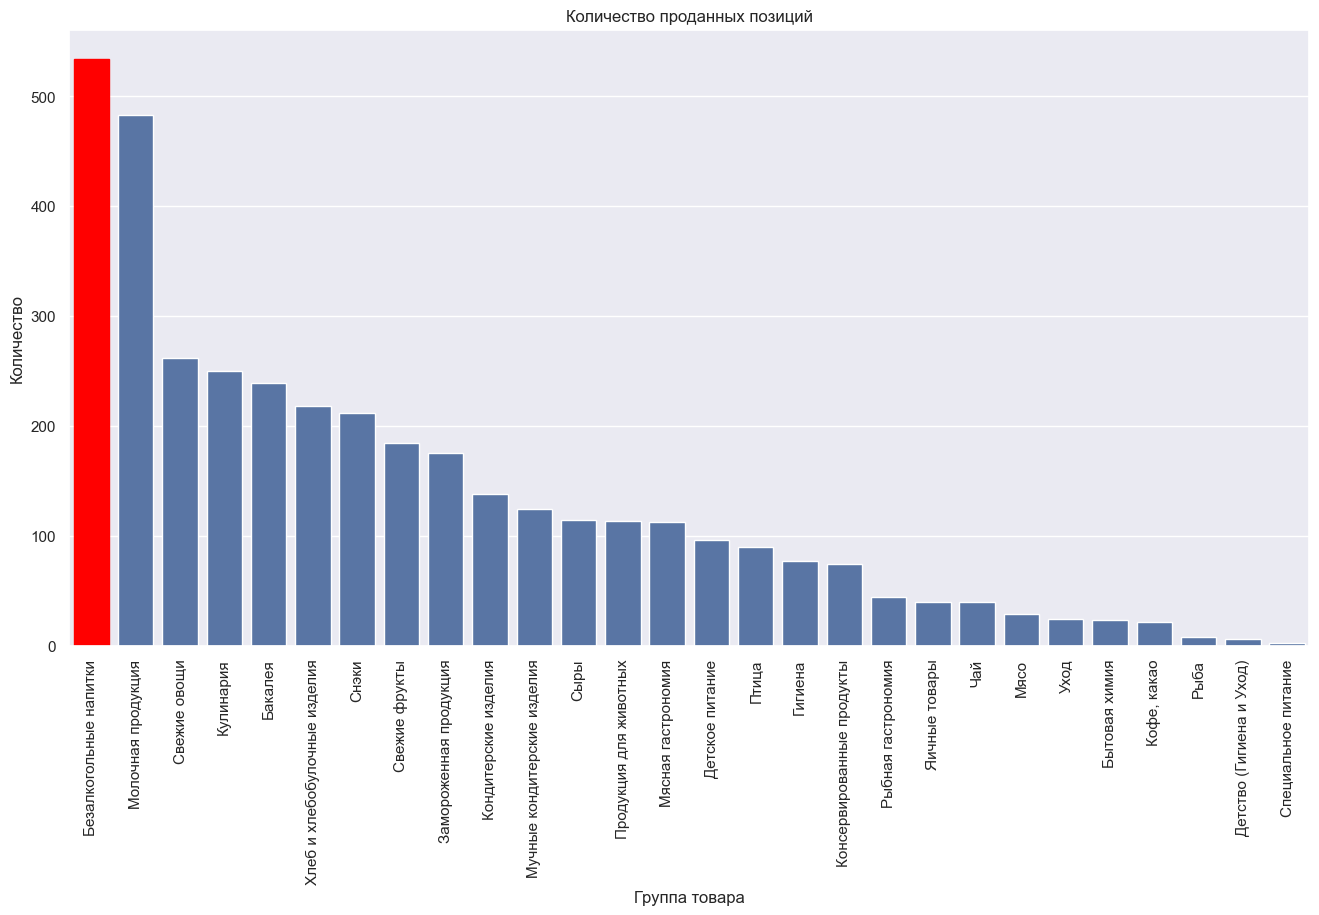

In [6]:
sns.set_theme(rc={'figure.figsize': (16, 8)})
fig = sns.barplot(data=q1, x='level1', y='quantity');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);
fig.set_title('Количество проданных позиций');
fig.set_ylabel('Количество');
fig.set_xlabel('Группа товара');
max_value = q1.sort_values(by='quantity', ascending=False)['quantity'][0]
for bar in fig.patches:
    if bar.get_height() == q1['quantity'].max().item():
        bar.set_color('red')

### Распределение продаж по подкатегориям

Оцените распределение количества проданных позиций в каждой товарной категории (`level1`) по подкатегориям (`level2`). Проиллюстрируйте свой результат расчетной таблицей.

In [7]:
q2 = df.groupby(['level1', 'level2'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
q2

,level1,level2,quantity
13,Безалкогольные напитки,Напитки,252
54,Кулинария,Готовые блюда,248
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
86,Снэки,Снэки соленые,180
12,Безалкогольные напитки,Воды питьевые,162
...,...,...,...
68,Мясная гастрономия,Субпродуктовые изделия,2
92,Уход,Средства по уходу за волосами,2
87,Специальное питание,Диетическое питание,2
17,Бытовая химия,Средства для сантехники,1


### Найти средний чек в заданную дату
Какой средний чек был 13.01.2022?

**Дополнительно:** Во всех заданиях (кроме расчета среднего чека) можно пренебречь товарами, которые указаны в orders, но отсутствуют в products.

In [8]:
q3 = orders.merge(products, how='left', on='product_id')
q3 = q3[q3['accepted_at'].dt.date.astype(str) == '2022-01-13'].groupby('order_id').apply(
    lambda x: (x['price'] * x['quantity']).sum(), 
    include_groups=False
).mean()
float(q3)

915.6378676470588

### Доля промо в заданной категории

Когда товар продается по промо-акции, его базовая цена не совпадает с фактической ценой.

Вам необходимо:

1.  Посчитать, какую долю от общих продаж категории `Сыры` занимают промо (в штуках)
2.  Построить пайчарт, который это проиллюстрирует. На графике должны быть видны группы, соответствующие доли и понятные подписи к ним.

In [9]:
q4 = df[df['level1'] == 'Сыры']
q4

,product_id,level1,level2,name,order_id,accepted_at,quantity,regular_price,price,cost_price
116,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517510145,2022-01-13 19:22:00,2,129,129,73
117,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517609703,2022-01-13 08:46:56,1,116,116,73
118,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517675616,2022-01-13 18:23:57,1,129,129,73
119,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517521855,2022-01-13 19:57:03,1,129,129,73
265,2134,Сыры,Твердые сычужные сыры,Сыр сливочный Брест-Литовск,1517668073,2022-01-13 22:43:39,1,199,159,110
...,...,...,...,...,...,...,...,...,...,...
2901,81977,Сыры,Мягкие сыры,Сыр творожный Danone,1517534036,2022-01-13 11:39:25,1,111,111,75
2902,81977,Сыры,Мягкие сыры,Сыр творожный Danone,1517518414,2022-01-13 12:17:22,1,111,111,75
2903,81977,Сыры,Мягкие сыры,Сыр творожный Danone,1517609703,2022-01-13 08:46:56,1,111,111,75
2966,93794,Сыры,Мягкие сыры,Вегчиз Самокат,1517370863,2022-01-13 15:48:52,1,229,160,103


In [10]:
cnt = int(q4['quantity'].sum())
cnt_promo = int(q4[q4['regular_price'] != q4['price']]['quantity'].sum())
cnt, cnt_promo

(114, 35)

In [11]:
q4 = pd.DataFrame.from_dict({'Без промо': (cnt-cnt_promo), 'С промо': cnt_promo}, orient='index').reset_index()
q4

,index,0
0,Без промо,79
1,С промо,35


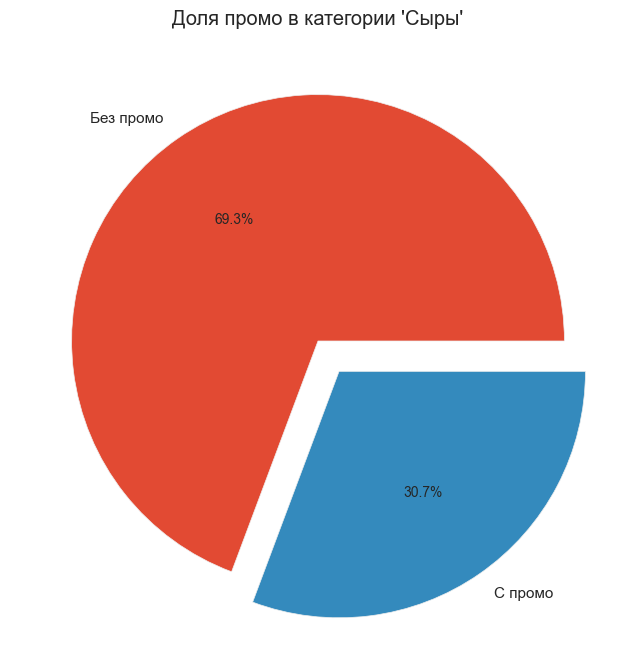

In [12]:
plt.figure(figsize=(16, 8))
plt.style.use('ggplot')
plt.title("Доля промо в категории 'Сыры'")
plt.pie(x=q4[0], 
        labels=q4['index'], 
        explode=[0, 0.15],
        autopct=f"%.1f%%"
);
plt.show();

### Посчитать маржу по категориям

Нужно посчитать маржу:

1.  В рублях
2.  В `%`

Сделать это нужно по всем категориям `level1` и отобразить с помощью 2 горизонтальных барчартов. Все подписи должны быть читаемыми и понятными.

In [13]:
def calc_margin(x):
    d = {}
    d['margin'] = sum((x['price'] - x['cost_price']) * x['quantity'])
    d['marginality'] = d['margin']/sum(x['price']* x['quantity']) * 100
    return pd.Series(d, index=['margin', 'marginality'])


In [14]:
q5 = df.copy()
q5 = q5.groupby('level1').apply(calc_margin, include_groups=False).reset_index()
q5

,level1,margin,marginality
0,Бакалея,8177.0,37.567766
1,Безалкогольные напитки,20373.0,44.186349
2,Бытовая химия,1441.0,26.305221
3,Гигиена,2971.0,29.547489
4,Детское питание,1817.0,35.690434
5,Детство (Гигиена и Уход),517.0,29.901677
6,Замороженная продукция,13099.0,47.264920
7,Кондитерские изделия,5918.0,42.447282
8,Консервированные продукты,4154.0,41.124641
9,"Кофе, какао",5059.0,51.828706


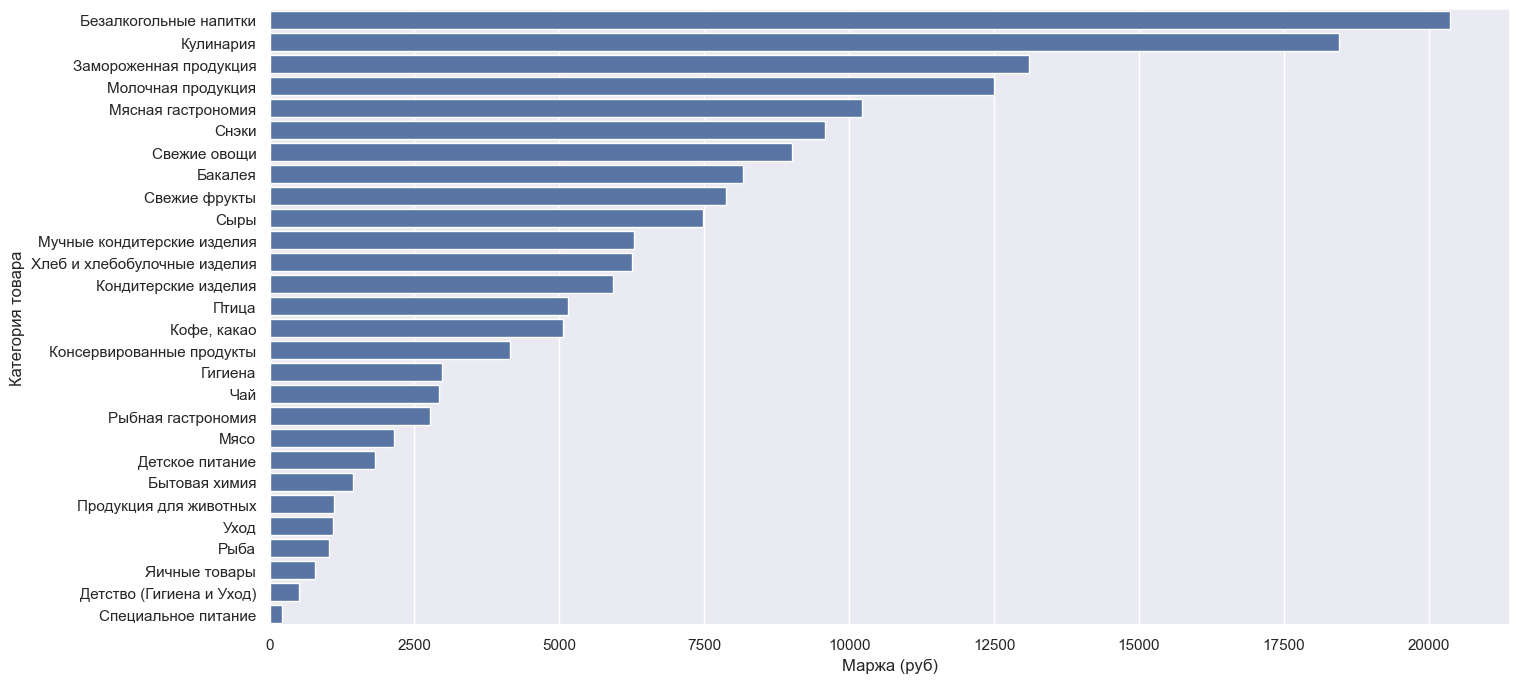

In [15]:
q5 = q5.sort_values('margin', ascending=False)
sns.set_theme(rc={'figure.figsize': (16, 8)})
fig = sns.barplot(data=q5, x='margin', y='level1', orient='h');
fig.set(xlabel='Маржа (руб)', ylabel='Категория товара');

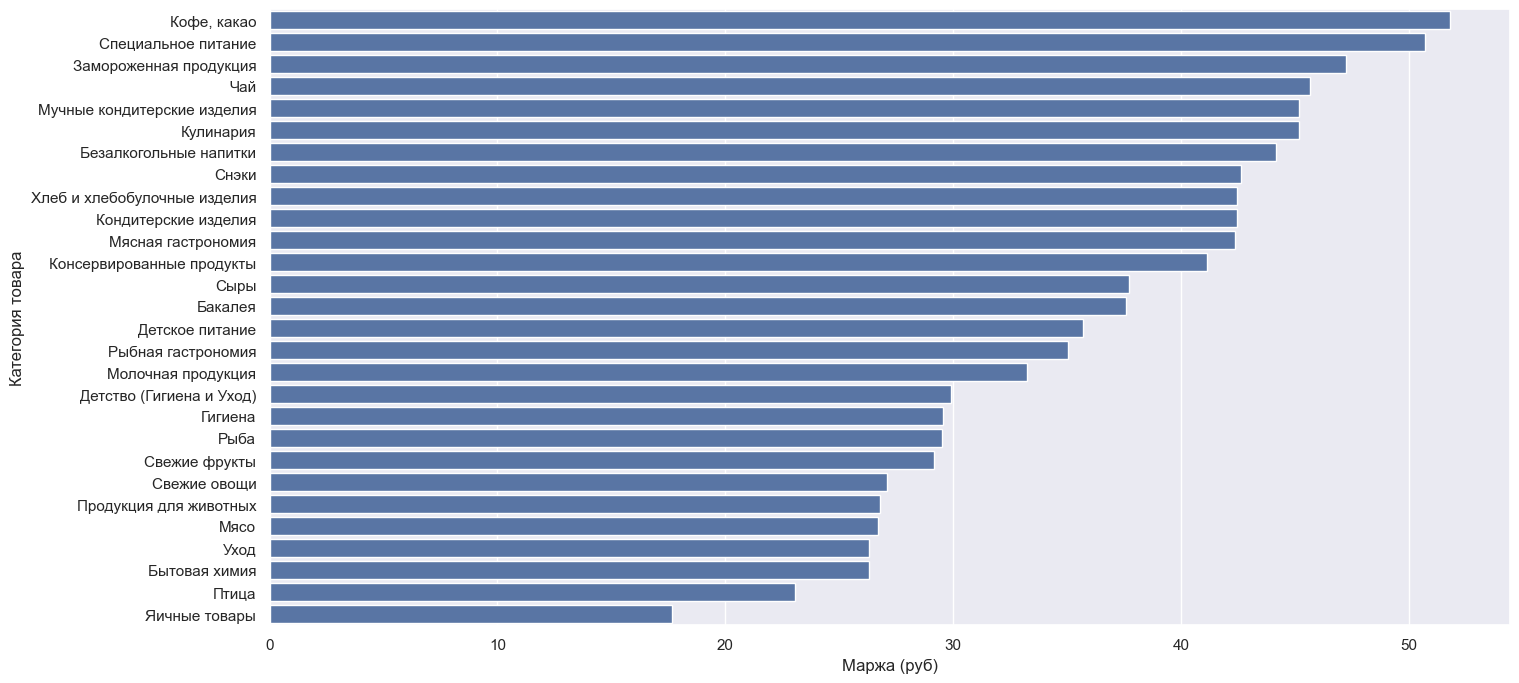

In [16]:
q5 = q5.sort_values('marginality', ascending=False)
sns.set_theme(rc={'figure.figsize': (16, 8)})
fig = sns.barplot(data=q5, x='marginality', y='level1', orient='h');
fig.set(xlabel='Маржа (руб)', ylabel='Категория товара');

### ABC анализ

1.  Сделайте ABC-анализ продаж по количеству
2.  Сделайте ABC-анализ по сумме продаж
3.  Сделайте новый столбец, в котором будет итоговая группа на основании двух анализов. Например: `A C`.

**Важно:** предлагаем провести ABC-анализ **по подкатегориям**, а не по отдельным товарам. Имеющихся у нас данных за небольшой период недостаточно для качественного анализа на уровне товаров. К тому же, количество товаров слишком велико, что может также исказить результаты. А ABC-анализ по подкатегориям даст более адекватную и интерпретируемую картину.

In [17]:
q6 = df[['level2', 'quantity', 'price']]
q6['total'] = q6['quantity'] * q6['price']
q6

C:\Temp\ipykernel_21780\4276846849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q6['total'] = q6['quantity'] * q6['price']


,level2,quantity,price,total
0,Сухие блюда быстрого приготовления,6,18,108
1,Сухие блюда быстрого приготовления,2,18,36
2,Сухие блюда быстрого приготовления,1,18,18
3,Сухие блюда быстрого приготовления,2,18,36
4,Сухие блюда быстрого приготовления,4,18,72
...,...,...,...,...
3013,Замороженные полуфабрикаты,1,179,179
3014,Замороженные полуфабрикаты,1,179,179
3015,Замороженные полуфабрикаты,1,179,179
3016,Колбасы,1,175,175


In [18]:
q6 = q6.groupby('level2').agg({'quantity': 'sum', 'total': 'sum'})
q6

,quantity,total
level2,,
"Бананы, косточковые и прочие плоды",76,10191
Бараночные и сухарные изделия,8,460
Бритье,3,731
Бумажная продукция,42,4569
Влажные салфетки,2,255
...,...,...
Чайные напитки,7,1349
Черный чай,26,3890
Шоколад,29,4265


In [19]:
q6['quantity_rel'] = q6['quantity']/sum(q6['quantity'])
q6 = q6.sort_values('quantity_rel', ascending=False)
q6['cumsum_quantity'] = q6['quantity_rel'].cumsum()
q6['quantity_abc'] = np.where(q6['cumsum_quantity'] < 0.8, 'A', np.where(q6['cumsum_quantity'] < 0.95, 'B', 'C'))
q6

,quantity,total,quantity_rel,cumsum_quantity,quantity_abc
level2,,,,,
Напитки,252,24123,0.067524,0.067524,A
Готовые блюда,248,40356,0.066452,0.133976,A
Хлеб и хлебобулочные изделия,218,14724,0.058414,0.192390,A
Снэки соленые,180,17293,0.048232,0.240622,A
Воды питьевые,162,9141,0.043408,0.284030,A
...,...,...,...,...,...
Пасты кондитерские,2,518,0.000536,0.998392,C
Средства по уходу за волосами,2,665,0.000536,0.998928,C
Субпродуктовые изделия,2,324,0.000536,0.999464,C


In [20]:
q6['total_rel'] = q6['total']/sum(q6['total'])
q6 = q6.sort_values('total_rel', ascending=False)
q6['cumsum_total'] = q6['total_rel'].cumsum()
q6['total_abc'] = np.where(q6['cumsum_total'] < 0.8, 'A', np.where(q6['cumsum_total'] < 0.95, 'B', 'C'))
q6

,quantity,total,quantity_rel,cumsum_quantity,quantity_abc,total_rel,cumsum_total,total_abc
level2,,,,,,,,
Готовые блюда,248,40356,0.066452,0.133976,A,0.090322,0.090322,A
Напитки,252,24123,0.067524,0.067524,A,0.053990,0.144312,A
Мясо птицы охлажденное,90,22349,0.024116,0.534030,A,0.050020,0.194332,A
"Тепличные овощи, грибы",105,18329,0.028135,0.482047,A,0.041023,0.235354,A
Снэки соленые,180,17293,0.048232,0.240622,A,0.038704,0.274058,A
...,...,...,...,...,...,...,...,...
Средства для сантехники,1,239,0.000268,0.999732,C,0.000535,0.998398,C
"Какао, горячий шоколад",2,238,0.000536,0.994641,C,0.000533,0.998930,C
Уход за одеждой и обувью,3,235,0.000804,0.987138,C,0.000526,0.999456,C


In [21]:
q6 = q6.reset_index()
q6['abc'] = q6.filter(like='abc').apply(' '.join, axis=1)
q6 = q6.sort_values('level2')
q6 = q6[['level2', 'abc']]
q6

,level2,abc
13,"Бананы, косточковые и прочие плоды",A A
85,Бараночные и сухарные изделия,C C
74,Бритье,C C
24,Бумажная продукция,A A
94,Влажные салфетки,C C
...,...,...
55,Чайные напитки,C B
30,Черный чай,B A
27,Шоколад,B A
86,Шоколадные конфеты в коробках,C C
